### Vaibhav Kumar 
### Roll no 19

# DATA CLEANING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# the data

In [2]:
titanic=pd.read_csv('D:\\vk\\TRIM 3\\ML\\DATASET\\titanic.csv')


In [3]:
titanic.head(10)

,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Gender       418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Missing data

In [5]:
titanic.isnull()

,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


<AxesSubplot:>

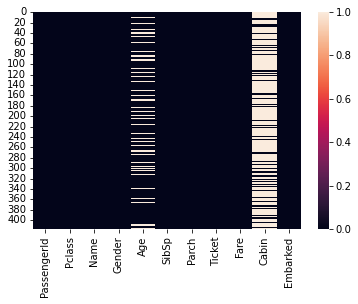

In [6]:
sns.heatmap(titanic.isnull())

**now we have to replace the age null value to some form of imputation** 

**and drop the cabin coloumn**

<AxesSubplot:xlabel='Embarked', ylabel='count'>

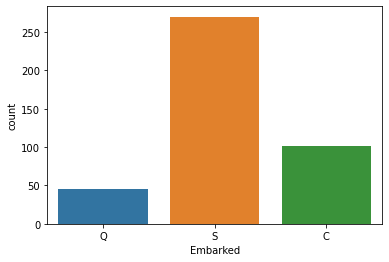

In [7]:
sns.countplot(x='Embarked',data=titanic)


**From passenger list most of the passengers are in Embarked "S" class**

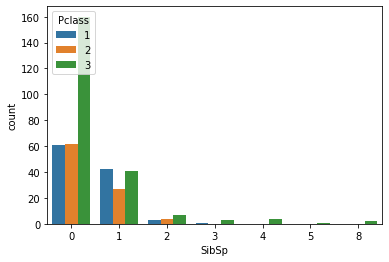

In [8]:
sns.countplot(x='SibSp',hue='Pclass',data=titanic);

*Color diff is the passengers class and x axis is siblings spouse*

**maximum passenegers are not dependent or zero dependance**

In [9]:
titanic['Fare']

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

<AxesSubplot:>

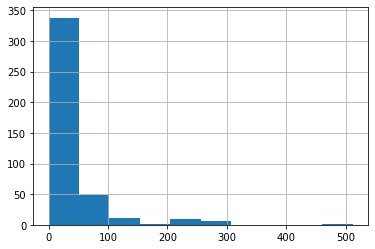

In [10]:
titanic['Fare'].hist()


**Max count comes in range 0-50**

In [11]:
titanic['Gender']

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Gender, Length: 418, dtype: object

<AxesSubplot:xlabel='Gender', ylabel='count'>

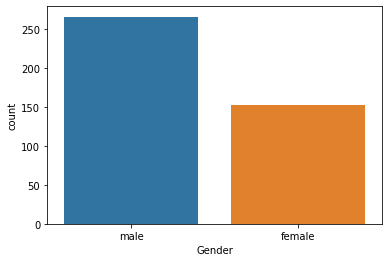

In [12]:
sns.countplot(x='Gender',data=titanic)

**Males are more than Females**

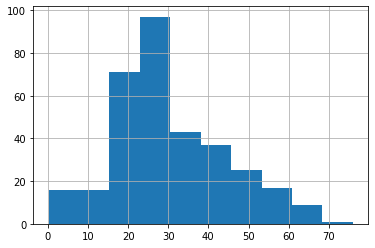

In [13]:
titanic['Age'].hist();


**most of the Passengers are of age between 20-30**

# Data Cleaning 

In [14]:
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

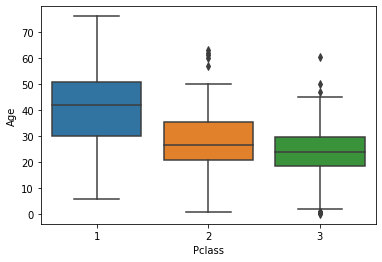

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [16]:
titanic.groupby('Pclass').mean()['Age']

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [17]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 41
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [18]:
titanic['Age']=titanic[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

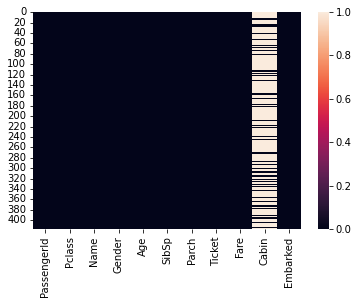

In [19]:
sns.heatmap(titanic.isnull())

**Age has no missing value **

In [20]:
titanic['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    24.0
414    39.0
415    38.5
416    24.0
417    24.0
Name: Age, Length: 418, dtype: float64

In [21]:
titanic.drop('Cabin',axis=1,inplace=True)

In [22]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Gender       418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


# Day 4 

In [29]:
titanic.dropna(inplace=True) # remove Nan Value 
# it will delete the entire row 

In [30]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Name         417 non-null    object 
 3   Gender       417 non-null    object 
 4   Age          417 non-null    float64
 5   SibSp        417 non-null    int64  
 6   Parch        417 non-null    int64  
 7   Ticket       417 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 35.8+ KB


### categorical value 

In [25]:
pd.get_dummies(titanic['Gender'])

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [26]:
pd.get_dummies(titanic['Gender'],drop_first=True)

,male
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [27]:
gender = pd.get_dummies(titanic['Gender'],drop_first=False)
gender

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [28]:
embark=pd.get_dummies(titanic['Embarked'],drop_first=False)
embark

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


In [31]:
titanic.drop(['Gender','Embarked','Name','Ticket'],axis=1,inplace=True)

In [32]:
titanic.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


In [33]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Age          417 non-null    float64
 3   SibSp        417 non-null    int64  
 4   Parch        417 non-null    int64  
 5   Fare         417 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 22.8 KB


In [34]:
titanic = pd.concat([titanic,gender,embark],axis=1)

In [35]:
titanic.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


In [37]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Age          417 non-null    float64
 3   SibSp        417 non-null    int64  
 4   Parch        417 non-null    int64  
 5   Fare         417 non-null    float64
 6   female       417 non-null    uint8  
 7   male         417 non-null    uint8  
 8   C            417 non-null    uint8  
 9   Q            417 non-null    uint8  
 10  S            417 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 24.8 KB
